<a href="https://colab.research.google.com/github/Javcm/Intro-a-Deep-Learning-UNAM-FC/blob/main/Tutorial_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualizando datos con Matplotlib

Usaremos una base de datos de suicidios para ilustrar el poder de Matplolib, pero primero un par de ejemplos sencillos...

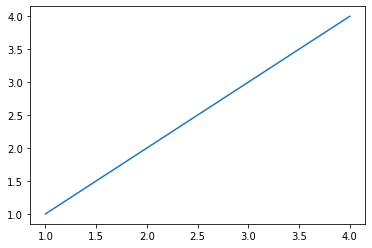

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4])
y = np.array([1, 2, 3, 4])     

plt.plot(x,y) 

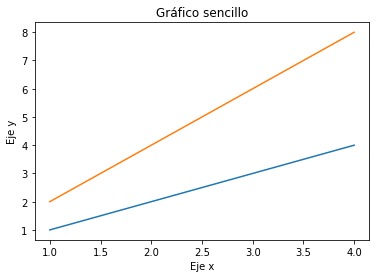

In [ ]:
#Agregando títulos y etiquetas
plt.plot(x,y)
plt.plot(x,2*y)

plt.title("Gráfico sencillo")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.show()

#Truco para que se vean más cool las gráficas
import seaborn as snb; snb.set();


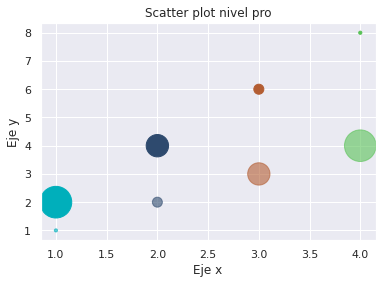

In [ ]:
#Truco para que se vean más cool las gráficas
import seaborn as snb; snb.set();


#Para remarcar los puntos de impresión
# plt.plot(x,y,color="b",marker="o")
# plt.plot(x,2*y,color="r",marker="o")

#Dos formas de hacer un scatter plot

# #Escogiendo puntos en lugar de lineas en plt.plot()
# plt.plot(x,y,"bo")  
# plt.plot(x,2*y,"ro") 

# plt.title("Scatter plot sencillo")
# plt.xlabel("Eje x")
# plt.ylabel("Eje y")
# plt.show()

#Usando plt.scatter()
# plt.scatter(x,y,c="#2e4a6e",s=100,alpha=0.8)

plt.scatter(x,y,c=["#00afbb","#2e4a6e","#b35d32","#59c257"],s=[10,100,500,1000],alpha=0.6)
plt.scatter(x,2*y,c=["#00afbb","#2e4a6e","#b35d32","#59c257"],s=[1000,500,100,10])

plt.title("Scatter plot nivel pro")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.show()

Bueno, ahora sí veamos datos reales

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
base_path = "/content/gdrive/MyDrive/DeepLearning/"
df = pd.read_csv(base_path + "suicide_data.csv")
df.head()
# !ls /content/gdrive/MyDrive/DeepLearning/


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.shape

(27820, 12)

In [ ]:
df[df["country"]=="Mexico"]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
16564,Mexico,1985,male,75+ years,44,432000,10.19,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation
16565,Mexico,1985,male,55-74 years,145,2330000,6.22,Mexico1985,0.634,"184,472,557,415",2730,G.I. Generation
16566,Mexico,1985,male,25-34 years,340,5679000,5.99,Mexico1985,0.634,"184,472,557,415",2730,Boomers
16567,Mexico,1985,male,35-54 years,327,5836000,5.60,Mexico1985,0.634,"184,472,557,415",2730,Silent
16568,Mexico,1985,male,15-24 years,375,8420000,4.45,Mexico1985,0.634,"184,472,557,415",2730,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
16931,Mexico,2015,female,35-54 years,303,15940497,1.90,Mexico2015,NaN,"1,169,622,672,463",10228,Generation X
16932,Mexico,2015,female,55-74 years,88,7021916,1.25,Mexico2015,NaN,"1,169,622,672,463",10228,Boomers
16933,Mexico,2015,male,5-14 years,137,11790898,1.16,Mexico2015,NaN,"1,169,622,672,463",10228,Generation Z
16934,Mexico,2015,female,5-14 years,95,11261292,0.84,Mexico2015,NaN,"1,169,622,672,463",10228,Generation Z


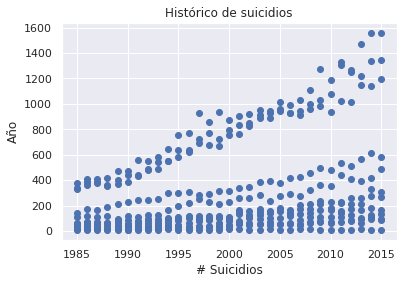

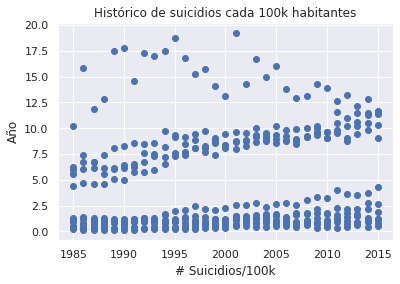

In [ ]:
x = df[df["country"]=="Mexico"]["year"]
y = df[df["country"]=="Mexico"]["suicides_no"]
y_escal = df[df["country"]=="Mexico"]["suicides/100k pop"]

plt.scatter(x,y) 
plt.title("Histórico de suicidios")
plt.xlabel("# Suicidios")
plt.ylabel("Año")
plt.show()


plt.scatter(x,y_escal)
plt.title("Histórico de suicidios cada 100k habitantes")
plt.xlabel("# Suicidios/100k")
plt.ylabel("Año")
plt.show()

#Nota: Esta es una muy mala representación de los datos, no es muy fácil de interpretar

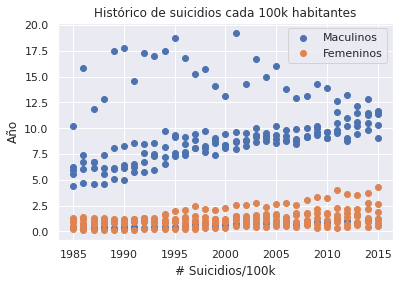

In [ ]:
x_male = df[(df["country"]=="Mexico")&(df["sex"]=="male")]["year"]
y_male = df[(df["country"]=="Mexico")&(df["sex"]=="male")]["suicides/100k pop"]

x_female = df[(df["country"]=="Mexico")&(df["sex"]=="female")]["year"]
y_female = df[(df["country"]=="Mexico")&(df["sex"]=="female")]["suicides/100k pop"]


plt.scatter(x_male,y_male,label="Maculinos")
plt.scatter(x_female,y_female,label="Femeninos")
plt.title("Histórico de suicidios cada 100k habitantes")
plt.xlabel("# Suicidios/100k")
plt.ylabel("Año")
plt.legend(loc="best")
plt.show()

#Haciendo subplots

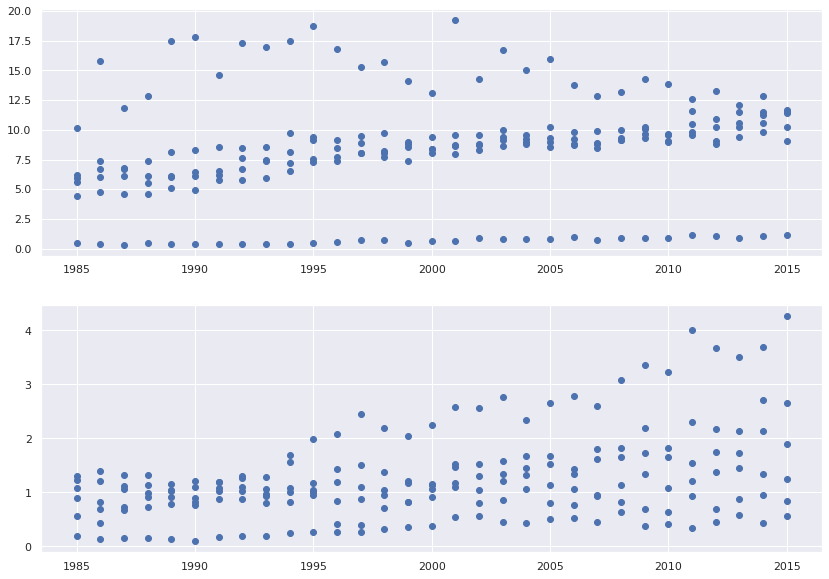

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,10))

ax1.scatter(x_male,y_male,label="Maculinos")
ax2.scatter(x_female,y_female,label="Femeninos")
plt.show()

In [ ]:
np.sort(edad)

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype='<U11')

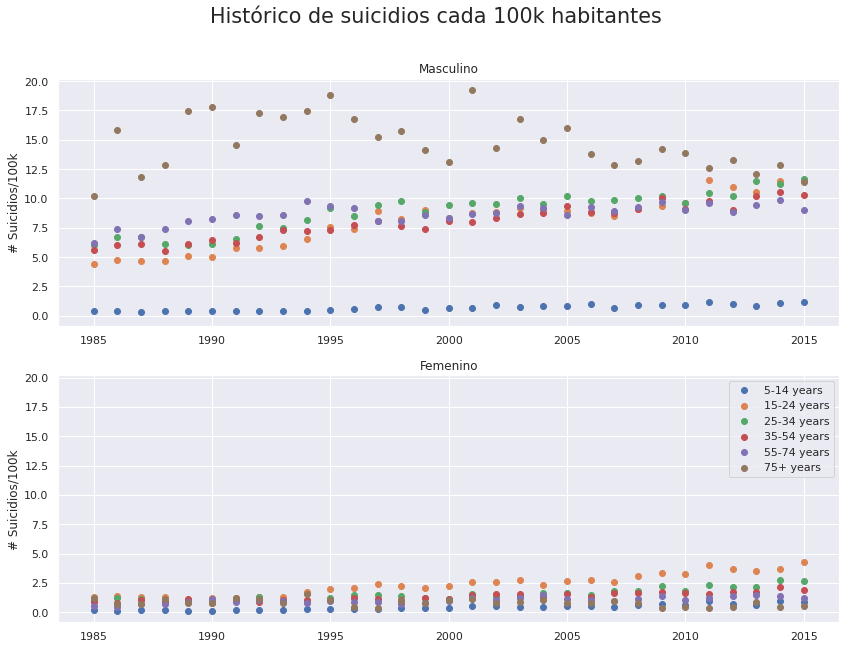

In [ ]:
edad = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'] #list(set(df["age"]))

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,10),sharey=True)

for i in range(len(edad)):
  ax1.scatter(df[(df["country"]=="Mexico")&(df["sex"]=="male")&(df["age"]==edad[i])]["year"],
              df[(df["country"]=="Mexico")&(df["sex"]=="male")&(df["age"]==edad[i])]["suicides/100k pop"],
              label=edad[i])
  ax2.scatter(df[(df["country"]=="Mexico")&(df["sex"]=="female")&(df["age"]==edad[i])]["year"],
              df[(df["country"]=="Mexico")&(df["sex"]=="female")&(df["age"]==edad[i])]["suicides/100k pop"],
              label=edad[i])

ax1.set_title('Masculino')
ax1.set_ylabel("# Suicidios/100k")

ax2.set_title('Femenino')
ax2.set_ylabel("# Suicidios/100k")

fig.suptitle("Histórico de suicidios cada 100k habitantes",fontsize ="xx-large")
plt.legend(loc="best")
fig.show()

# Gráficas de barras 

In [ ]:
#Un data set más resumido con los promedios históricos

df_prom = pd.read_csv(base_path + "suicidios_prom_historico.csv")
print(df_prom.shape)
df_prom.head()


(101, 19)


,Unnamed: 0,Pais,Promedio de suicidios/100k,Prom suicidios femeninos /100k,GDP promedio,HDI/year promedio,Prom suicidios masculinos /100k,E5_14,E15_24,E25_34,E35_54,E55_74,E75+,GIGen,Silent,Boomers,GenX,Millenials,GenZ
0,0,Albania,3.50,1859.05,0.67,2.42,4.59,0.43,4.51,4.28,3.64,3.09,5.06,4.47,3.83,3.38,4.63,1.63,0.68
1,1,Antigua and Barbuda,0.55,10448.19,0.78,0.10,1.01,0.00,0.00,0.28,1.17,1.87,0.00,0.00,1.42,1.24,0.00,0.00,0.00
2,2,Argentina,10.47,7914.10,0.78,3.80,17.14,0.68,8.85,7.79,8.53,13.23,23.73,25.11,14.74,7.96,6.21,6.63,0.86
3,3,Armenia,3.28,1873.92,0.69,1.61,4.94,0.20,1.25,2.18,3.27,4.95,7.69,7.07,6.48,3.34,1.90,0.90,0.29
4,4,Aruba,9.50,24221.64,NaN,3.29,15.72,0.00,4.06,13.09,9.68,10.64,19.55,76.58,7.14,10.34,12.02,2.21,0.00


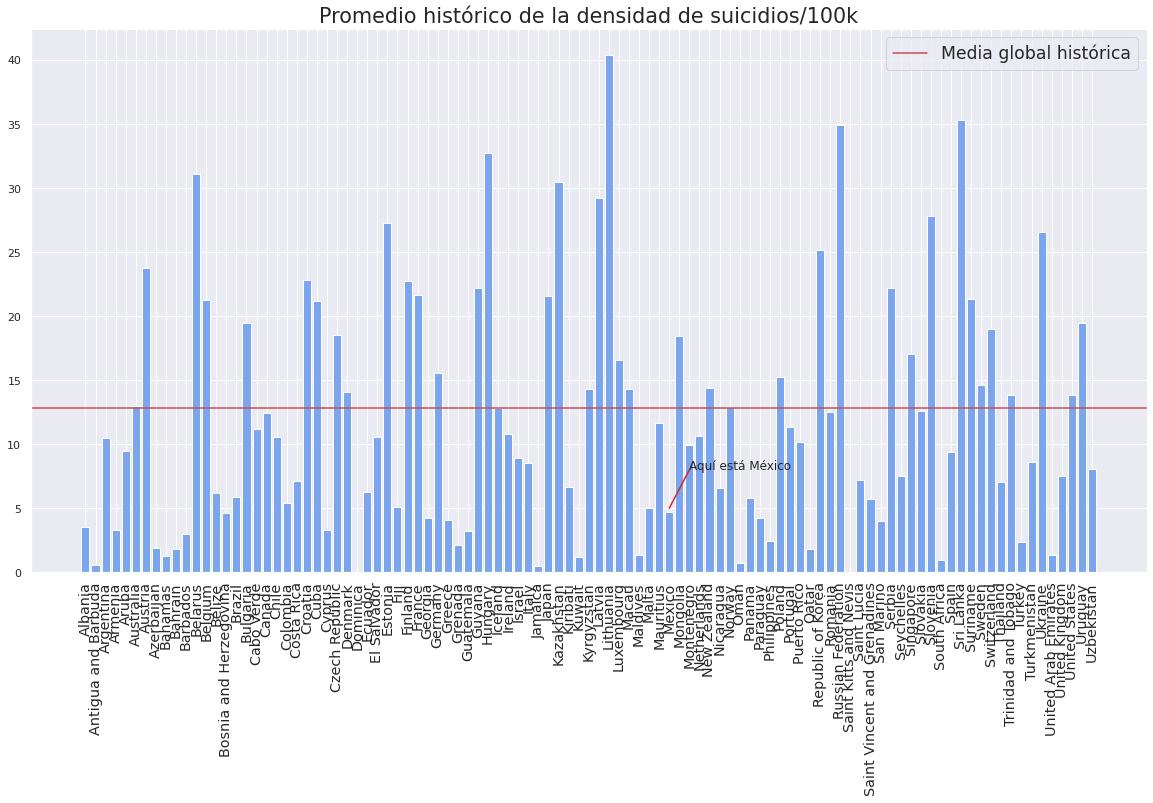

In [ ]:
#Vamos a ver cómo hacer gráficas de barras bien coquetas
 
f=plt.figure(figsize=(20,10))
plt.bar(df_prom["Pais"],df_prom["Promedio de suicidios/100k"],color="#7ba5ed")

#Para poner una rejilla
plt.grid(True)

#Para poner texto
plt.text(60,8, "Aquí está México")
#Complementando con una linea para indicar
plt.plot([58,60], [5,8],c="#d12828");

#Permite poner una gráfica horizontal
plt.axhline(y=12.82, color='r', linestyle='-',label="Media global histórica")

plt.title("Promedio histórico de la densidad de suicidios/100k",fontsize='xx-large')

#Permite girar las etiquetas
plt.xticks(rotation=90,fontsize='large')
plt.legend(loc="best",fontsize='x-large')
plt.show()

#Para guardar una figura
f.savefig("suicidios_paises.png")
#f.savefig(base_path+"suicidios_paises.png")

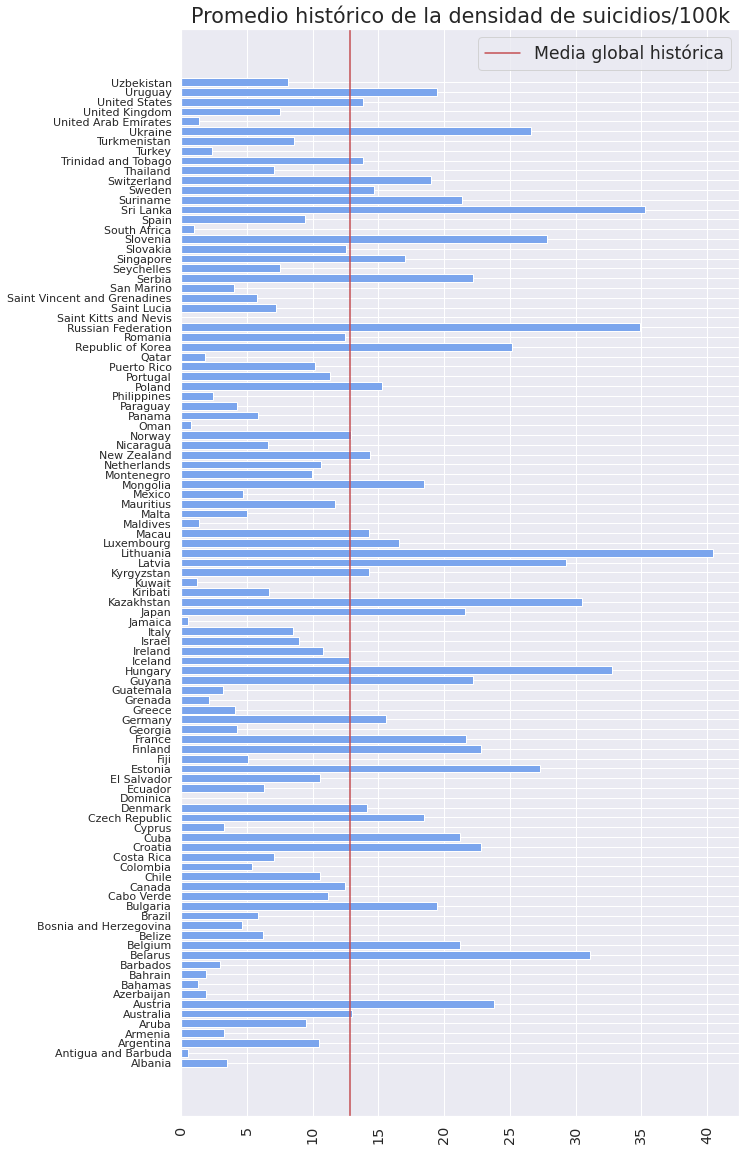

In [ ]:
#Vamos a ver cómo hacer gráficas de barras bien coquetas
 
f=plt.figure(figsize=(10,20))
plt.barh(df_prom["Pais"],df_prom["Promedio de suicidios/100k"],color="#7ba5ed")

#Para poner una rejilla
plt.grid(True)

#Para poner texto
#plt.text(60,8, "Aquí está México")
#Complementando con una linea para indicar
#plt.plot([58,60], [5,8],c="#d12828");

#Permite poner una gráfica horizontal
plt.axvline(x=12.82, color='r', linestyle='-',label="Media global histórica")

plt.title("Promedio histórico de la densidad de suicidios/100k",fontsize='xx-large')

#Permite girar las etiquetas
plt.xticks(rotation=90,fontsize='large')
plt.legend(loc="best",fontsize='x-large')
plt.show()

#Para guardar una figura
f.savefig("suicidios_paises.png")
#f.savefig(base_path+"suicidios_paises.png")

# Hacer un mapa de calor con Seaborn

In [ ]:
#Primero tenemos que normalizar las variables

#Sklearn es una librería muy poderosa para tareas de machine learning, aquí sólo la usamos para normalizar las columnas numéricas del data frame
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

#Escogemos las variables numéricas y creamos el data set df_num que sólo contiene estas
cols = ['population','suicides/100k pop', 'suicides_no','HDI for year', 'gdp_per_capita ($)']
df_num = df[cols]

#Normalizando
df_sc = ss.fit_transform(df_num)
df_sc = pd.DataFrame(df_sc, columns=cols)
#Creando la matriz de correlaciones
corr = df_sc.corr()

f, ax = plt.subplots(figsize=(10, 6))
#Usamos la función heatmap de seaborn que utiliza una matriz de correlación entre variables
hm = snb.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.suptitle('Mapa de calor de correlación', fontsize=14)


<img src="https://matplotlib.org/stable/_images/anatomy.png">

**Aqui comienzo a probar con los valores de la columna de suicidios femeninos** 

In [ ]:
df_prom["Prom suicidios femeninos /100k"] # Aqui no me cuadran los valores, estan muy altos. No se si tenga que regularlos de alguna manera 
# o cambiar las proporciones de la grafica o es que estan mal... 

0       1859.05
1      10448.19
2       7914.10
3       1873.92
4      24221.64
         ...   
96     42162.00
97     31908.35
98     39269.61
99      7622.07
100      976.18
Name: Prom suicidios femeninos /100k, Length: 101, dtype: float64

In [ ]:
df_prom["Prom suicidios femeninos /100k"] = df_prom["Prom suicidios femeninos /100k"]/1000
df_prom["Prom suicidios femeninos /100k"]

0       1.85905
1      10.44819
2       7.91410
3       1.87392
4      24.22164
         ...   
96     42.16200
97     31.90835
98     39.26961
99      7.62207
100     0.97618
Name: Prom suicidios femeninos /100k, Length: 101, dtype: float64

In [ ]:
df_prom

,Unnamed: 0,Pais,Promedio de suicidios/100k,Prom suicidios femeninos /100k,GDP promedio,HDI/year promedio,Prom suicidios masculinos /100k,E5_14,E15_24,E25_34,E35_54,E55_74,E75+,GIGen,Silent,Boomers,GenX,Millenials,GenZ
0,0,Albania,3.50,1.85905,0.67,2.42,4.59,0.43,4.51,4.28,3.64,3.09,5.06,4.47,3.83,3.38,4.63,1.63,0.68
1,1,Antigua and Barbuda,0.55,10.44819,0.78,0.10,1.01,0.00,0.00,0.28,1.17,1.87,0.00,0.00,1.42,1.24,0.00,0.00,0.00
2,2,Argentina,10.47,7.91410,0.78,3.80,17.14,0.68,8.85,7.79,8.53,13.23,23.73,25.11,14.74,7.96,6.21,6.63,0.86
3,3,Armenia,3.28,1.87392,0.69,1.61,4.94,0.20,1.25,2.18,3.27,4.95,7.69,7.07,6.48,3.34,1.90,0.90,0.29
4,4,Aruba,9.50,24.22164,NaN,3.29,15.72,0.00,4.06,13.09,9.68,10.64,19.55,76.58,7.14,10.34,12.02,2.21,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,United Arab Emirates,1.32,42.16200,0.82,0.97,1.67,0.05,1.60,1.83,1.61,2.02,0.79,NaN,1.41,1.77,1.69,1.20,0.08
97,97,United Kingdom,7.50,31.90835,0.86,3.40,11.60,0.11,5.93,9.81,10.89,8.50,9.77,11.91,8.09,10.07,7.64,3.39,0.14
98,98,United States,13.82,39.26961,0.89,4.68,22.96,0.73,11.35,14.17,16.04,15.94,24.68,25.63,17.05,15.75,11.91,6.70,0.74
99,99,Uruguay,19.46,7.62207,0.75,6.51,32.41,0.70,12.16,15.09,17.43,25.67,45.71,37.31,32.14,17.12,11.96,9.65,0.81


# Tarea Moral

Usando el archivo csv con los promedios históricos, reproducir las gráficas llamadas Tarea 1 y Tarea 2 que se encuentran en la carpeta de Drive.

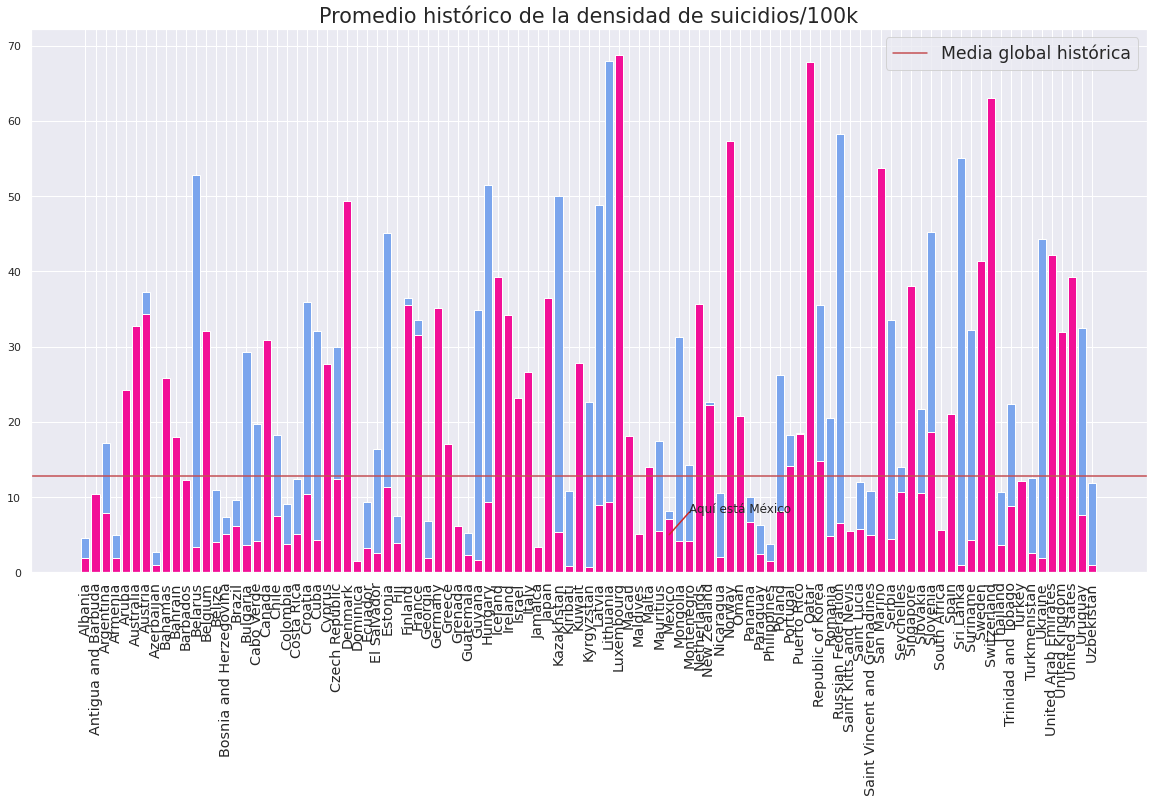

In [ ]:
# x_male = df[(df["country"]=="Mexico")&(df["sex"]=="male")]["year"]
# y_male = df[(df["country"]=="Mexico")&(df["sex"]=="male")]["suicides/100k pop"]

# x_female = df[(df["country"]=="Mexico")&(df["sex"]=="female")]["year"]
# y_female = df[(df["country"]=="Mexico")&(df["sex"]=="female")]["suicides/100k pop"]

# plt.scatter(x_male,y_male,label="Maculinos")
# plt.scatter(x_female,y_female,label="Femeninos")
# plt.title("Histórico de suicidios cada 100k habitantes")
# plt.xlabel("# Suicidios/100k")
# plt.ylabel("Año")
# plt.legend(loc="best")
# plt.show()




#Vamos a ver cómo hacer gráficas de barras bien coquetas

#df_prom["Prom suicidios femeninos /100k"] = df_prom["Prom suicidios femeninos /100k"]/100000

f=plt.figure(figsize=(20,10))
#plt.bar(df_prom["Pais"],df_prom["Promedio de suicidios/100k"],color="#7ba5ed")
plt.bar(df_prom["Pais"],df_prom["Prom suicidios masculinos /100k"],color="#7ba5ed")
plt.bar(df_prom["Pais"],df_prom["Prom suicidios femeninos /100k"],color="#f20f97")
#plt.bar(df_prom["Pais"],df_prom["Prom suicidios masculinos /100k"],color="#7ba5ed")

#Para poner una rejilla
plt.grid(True)

#Para poner texto
plt.text(60,8, "Aquí está México")
#Complementando con una linea para indicar
plt.plot([58,60], [5,8],c="#d12828");

#Permite poner una gráfica horizontal
plt.axhline(y=12.82, color='r', linestyle='-',label="Media global histórica")

plt.title("Promedio histórico de la densidad de suicidios/100k",fontsize='xx-large')

#Permite girar las etiquetas
plt.xticks(rotation=90,fontsize='large')
plt.legend(loc="best",fontsize='x-large')
plt.show()

#Para guardar una figura
f.savefig("suicidios_paises.png")
#f.savefig(base_path+"suicidios_paises.png")